<a href="https://colab.research.google.com/github/AkshatGupta15/Stamatics-Deepflow-25/blob/main/Assignment_1_Deepflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
df = pd.read_excel('/content/data.xlsx')

In [5]:
df.head()

,name,online_order,book_table,Rating,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [6]:
cols = df.columns
cols

Index(['name', 'online_order', 'book_table', 'Rating', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
df.shape

(41263, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41263 entries, 0 to 41262
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         41263 non-null  object 
 1   online_order                 41263 non-null  object 
 2   book_table                   41263 non-null  object 
 3   Rating                       41263 non-null  float64
 4   votes                        41263 non-null  int64  
 5   location                     41263 non-null  object 
 6   rest_type                    41263 non-null  object 
 7   cuisines                     41263 non-null  object 
 8   approx_cost(for two people)  41263 non-null  int64  
 9   listed_in(type)              41263 non-null  object 
 10  listed_in(city)              41263 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.5+ MB


In [10]:
df.describe()

,Rating,votes,approx_cost(for two people)
count,41263.000000,41263.000000,41263.000000
mean,3.702011,352.683179,603.914063
std,0.439985,884.177761,464.942973
min,1.800000,0.000000,40.000000
25%,3.400000,21.000000,300.000000
50%,3.700000,73.000000,500.000000
75%,4.000000,277.000000,750.000000
max,4.900000,16832.000000,6000.000000


### Checking for Missing Values

#### Bar Plot of Missing Values in Each Column

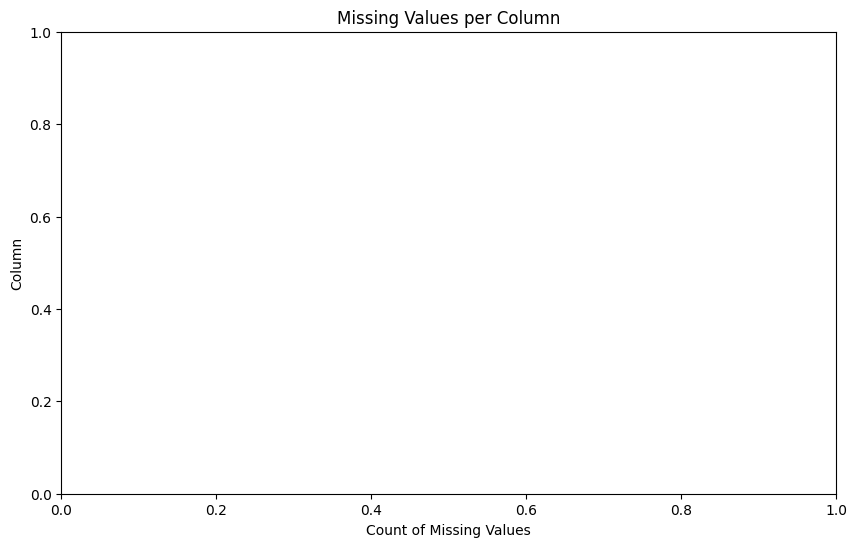

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing values count
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]


plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette="Reds_r")
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Column")
plt.show()

In [11]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
Rating,0
votes,0
location,0
rest_type,0
cuisines,0
approx_cost(for two people),0
listed_in(type),0


### Checking for Duplicate

In [12]:
print(df.duplicated().sum())

73


In [13]:
df = df.drop_duplicates()

In [14]:
print(df.duplicated().sum())

0


## Correct Inconsistent Data Formats

#### Strip whitespace and title case for object columns

In [ ]:
cols_to_clean = ['name', 'online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'listed_in(type)', 'listed_in(city)']

for col in cols_to_clean:
    df[col] = df[col].astype(str).str.strip().str.title()


#### Standardize cuisines

In [ ]:
df.loc[:, 'cuisines'] = df['cuisines'].astype(str).apply(
    lambda x: ', '.join([c.strip().title() for c in x.split(',')])
)

In [16]:
df['cuisines']

,cuisines
0,"North Indian, Mughlai, Chinese"
1,"Chinese, North Indian, Thai"
2,"Cafe, Mexican, Italian"
3,"South Indian, North Indian"
4,"North Indian, Rajasthani"
...,...
41258,"North Indian, Continental"
41259,"Andhra, South Indian, Chinese, North Indian"
41260,Continental
41261,Finger Food


### Standardize Key Columns (Ratings, Price, Location)

In [15]:
print(df['Rating'].min())
print(df['Rating'].max())

1.8
4.9


In [19]:
print(df['approx_cost(for two people)'].min())
print(df['approx_cost(for two people)'].max())

40
6000


In [22]:
print("Missing values:", df['Rating'].isna().sum())
print("Missing values:", df['approx_cost(for two people)'].isna().sum())

Missing values: 0
Missing values: 0


#### Clean approx_cost (convert string with commas to int)

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median())


### Convert Columns to Correct Data Types

In [23]:
df['votes'] = df['votes'].astype(int)
df['Rating'] = df['Rating'].astype(float)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)

### Save the Cleaned Dataset

In [24]:
df.to_csv("zomato_cleaned.csv", index=False)

### Group by Cuisine and Calculate Averages

In [25]:
df['primary_cuisine'] = df['cuisines'].apply(lambda x: x.split(',')[0].strip())

grouped = df.groupby('primary_cuisine').agg({
    'Rating': 'mean',
    'votes': 'mean',
    'approx_cost(for two people)': ['mean', 'min', 'max']
}).sort_values(('Rating', 'mean'), ascending=False)

print(grouped.head(10))

                   Rating        votes approx_cost(for two people)            
                     mean         mean                        mean   min   max
primary_cuisine                                                               
African          4.592308   478.923077                 1000.000000  1000  1000
Malaysian        4.425000  1748.187500                 1200.000000  1000  1800
Parsi            4.406667  3686.600000                 1300.000000  1300  1300
Middle Eastern   4.400000  1436.200000                  300.000000   300   300
Sushi            4.400000   219.333333                 2000.000000  2000  2000
Modern Indian    4.314019  1087.130841                 1572.897196   250  2500
Singaporean      4.300000   385.000000                 1500.000000  1500  1500
German           4.300000  2320.500000                 1800.000000  1800  1800
European         4.261842  1640.907895                 1792.543860  1300  3000
Portuguese       4.227273   891.909091              

### Identify Top Cuisines by Rating & Popularity

In [26]:
top_cuisines = grouped.sort_values(('Rating', 'mean'), ascending=False).head(10)
print(top_cuisines)

                   Rating        votes approx_cost(for two people)            
                     mean         mean                        mean   min   max
primary_cuisine                                                               
African          4.592308   478.923077                 1000.000000  1000  1000
Malaysian        4.425000  1748.187500                 1200.000000  1000  1800
Parsi            4.406667  3686.600000                 1300.000000  1300  1300
Middle Eastern   4.400000  1436.200000                  300.000000   300   300
Sushi            4.400000   219.333333                 2000.000000  2000  2000
Modern Indian    4.314019  1087.130841                 1572.897196   250  2500
Singaporean      4.300000   385.000000                 1500.000000  1500  1500
German           4.300000  2320.500000                 1800.000000  1800  1800
European         4.261842  1640.907895                 1792.543860  1300  3000
Portuguese       4.227273   891.909091              

### Best-Rated Restaurants by Cuisine

In [27]:
best_rated = df[df['Rating'] >= 4.5].sort_values(by='Rating', ascending=False)
print(best_rated[['name', 'cuisines', 'Rating', 'votes']].head(10))


                                 name  \
30545          Belgian Waffle Factory   
3825      Byg Brewski Brewing Company   
22446  Asia Kitchen By Mainland China   
40027     Byg Brewski Brewing Company   
23154  Asia Kitchen By Mainland China   
31927                    Punjab Grill   
11649          Belgian Waffle Factory   
14124          Belgian Waffle Factory   
31482                    Punjab Grill   
39351     Byg Brewski Brewing Company   

                                                cuisines  Rating  votes  
30545                                           Desserts     4.9   1749  
3825   Continental, North Indian, Italian, South Indi...     4.9  16345  
22446                        Asian, Chinese, Thai, Momos     4.9   2227  
40027  Continental, North Indian, Italian, South Indi...     4.9  16832  
23154                        Asian, Chinese, Thai, Momos     4.9   2235  
31927                              North Indian, Mughlai     4.9   1940  
11649                         

### Analyze Preferences by Cuisine

In [28]:
from collections import Counter

all_cuisines = df['cuisines'].str.split(',').sum()
common_cuisines = pd.Series(Counter([c.strip() for c in all_cuisines])).sort_values(ascending=False)

print(common_cuisines.head(10))

North Indian    17180
Chinese         12834
South Indian     6351
Fast Food        6314
Continental      5180
Biryani          5008
Cafe             4781
Desserts         4501
Beverages        3828
Italian          3167
dtype: int64


### Visualize with Matplotlib

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Top cuisines by count

<ipython-input-38-485199505>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='pastel')


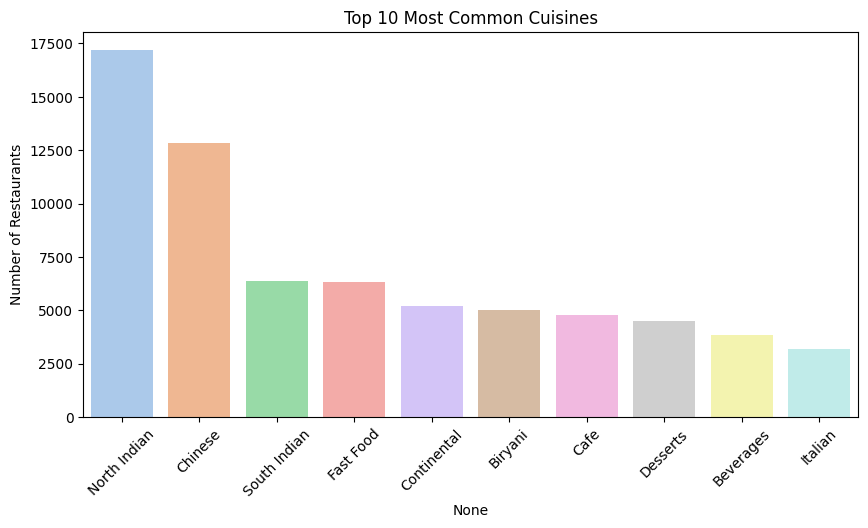

In [38]:
from collections import Counter
# Break down all cuisines
all_cuisines = df['cuisines'].str.split(',').sum()
cuisine_counts = pd.Series(Counter([c.strip() for c in all_cuisines])).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='pastel')
plt.title('Top 10 Most Common Cuisines')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

#### Top cuisines by average rating

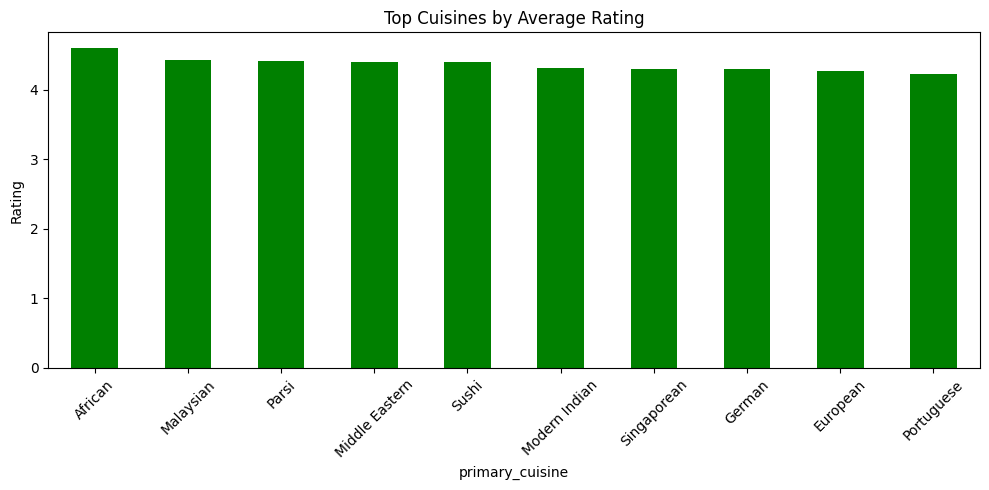

In [31]:
top_cuisines['Rating']['mean'].plot(kind='bar', figsize=(10,5), color='green')
plt.title('Top Cuisines by Average Rating')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Distribution of Ratings

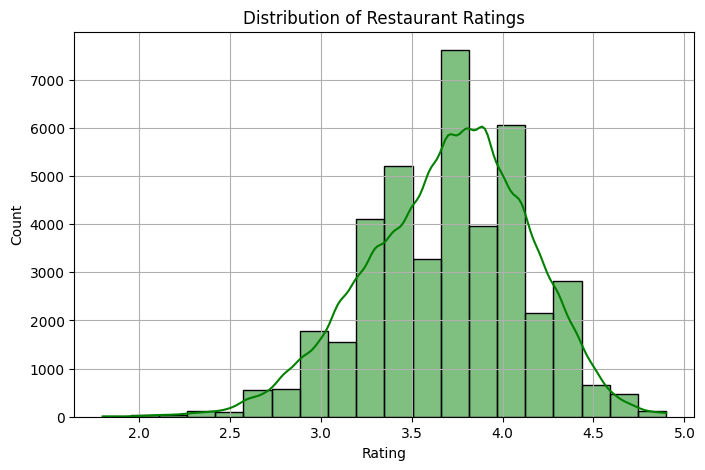

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()


#### Distribution of Cost for Two People

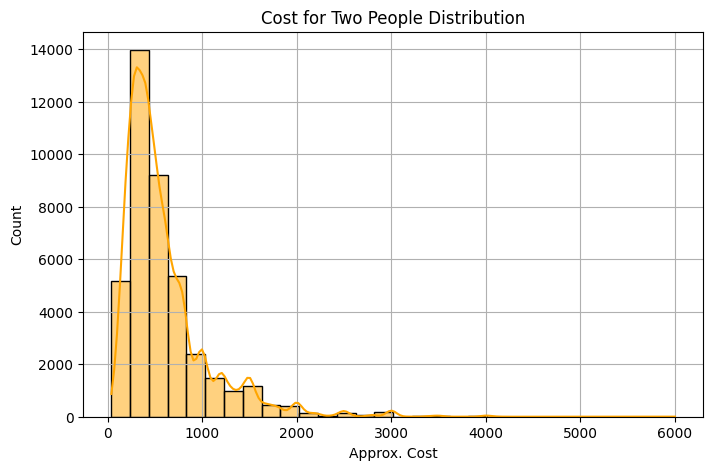

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df['approx_cost(for two people)'], bins=30, kde=True, color='orange')
plt.title('Cost for Two People Distribution')
plt.xlabel('Approx. Cost')
plt.ylabel('Count')
plt.grid(True)
plt.show()


#### Top 10 Locations with Most Restaurants

<ipython-input-37-2099077918>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='Set2')


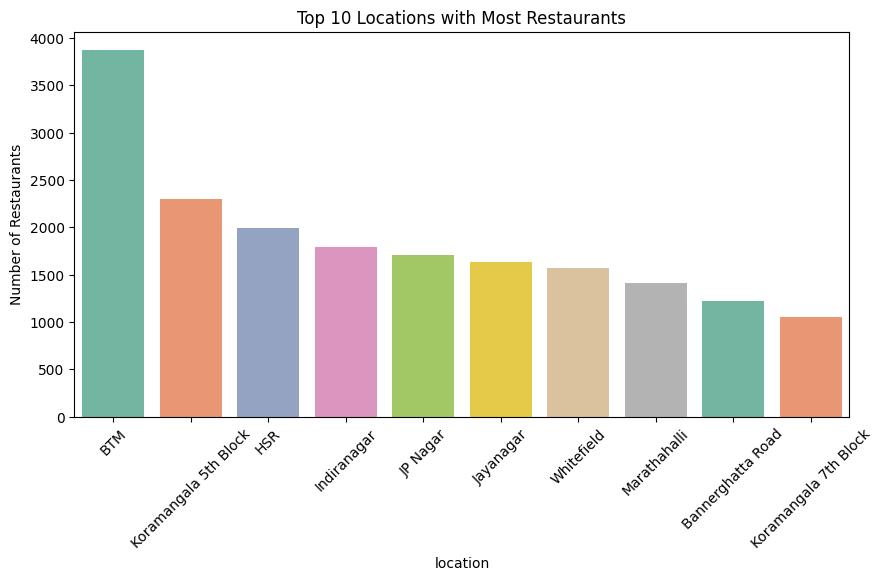

In [37]:
top_locations = df['location'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='Set2')
plt.title('Top 10 Locations with Most Restaurants')
plt.xticks(rotation=45)
plt.ylabel('Number of Restaurants')
plt.show()

#### Ratings vs Cost Scatterplot

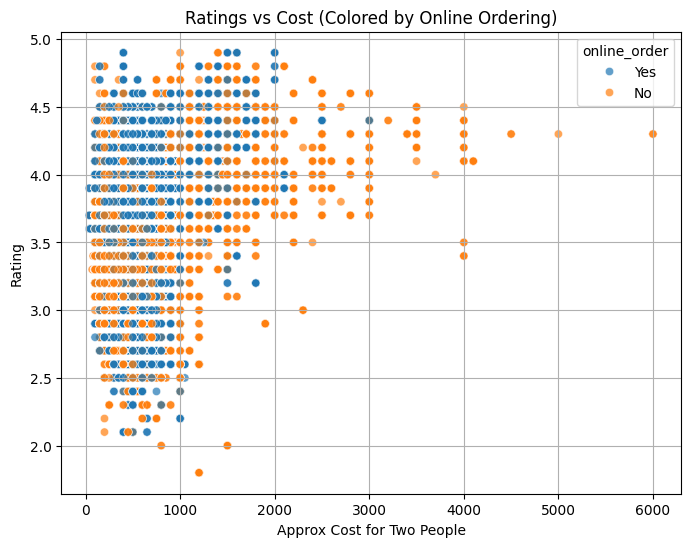

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='approx_cost(for two people)', y='Rating', hue='online_order', alpha=0.7)
plt.title('Ratings vs Cost (Colored by Online Ordering)')
plt.xlabel('Approx Cost for Two People')
plt.ylabel('Rating')
plt.grid(True)
plt.show()